# Testing Linearity

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from lintest.testers.linearity import linearity_tester
from lintest.zoo.functions import make_linear, make_stretched_tanh, make_noisy_linear, make_corrupted_linear
from lintest.zoo.distributions import make_uniform

Given continuous function $f:\mathbb{R}^d\to\mathbb{R}$ and distribution $\mathcal{D}$ over $\mathbb{R}^d$, reject if:

$\mathbb{P}_{x\sim\mathcal{D}}\left(f(x)\neq g(x)\right)>\epsilon$ for any linear measurable function $g$

Test from <em>Fleming and Yoshida, "Distribution-Free Testing of Linear Functions on $\mathbb{R}^n$" (ITCS 2020)</em>

We use $\mathcal{D}=\mathcal{N}(0,1)$ in this notebook

## Linear functions

The test always accepts linear functions

In [2]:
w = np.random.normal(size=1)
f = make_linear(w)
linearity_tester(f, input_dim=1, eps=0.1, conf=0.9)

True

The number of queries is independent of the input dimension $d$

Text(0, 0.5, 'Calls')

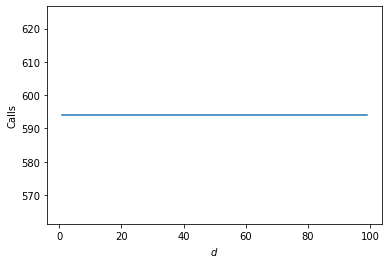

In [3]:
dims = range(1,100)
calls = []
for dim in dims:
    g = make_linear(np.random.normal(size=dim))
    linearity_tester(g, input_dim=dim, eps=0.1, conf=0.9)
    calls.append(g.get_calls())
plt.figure()
plt.plot(dims, calls)
plt.xlabel('$d$')
plt.ylabel('Calls')

The number of queries is $\mathcal{O}\left(\frac{1}{\epsilon}\log\frac{1}{\epsilon}\log\frac{1}{\delta}\right)$ where $\epsilon$ is the closeness parameter and $\delta$ the probability of false positives

Text(0, 0.5, 'Calls')

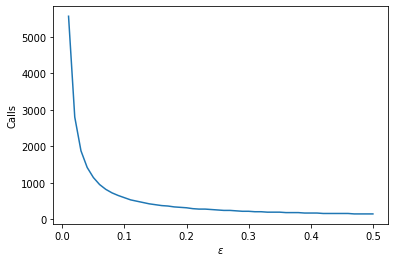

In [4]:
epss = np.linspace(0.01,0.5,50)
calls = []
for eps in epss:
    f.reset_calls()
    linearity_tester(f, input_dim=1, eps=eps, conf=0.9)
    calls.append(f.get_calls())
plt.figure()
plt.plot(epss, calls)
plt.xlabel('$\epsilon$')
plt.ylabel('Calls')

Text(0, 0.5, 'Calls')

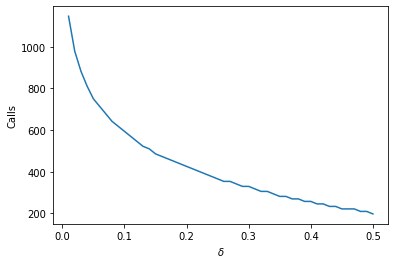

In [5]:
deltas = np.linspace(0.01,0.5,50)
calls = []
for delta in deltas:
    f.reset_calls()
    linearity_tester(f, input_dim=1, eps=0.1, conf=1-delta)
    calls.append(f.get_calls())
plt.figure()
plt.plot(deltas, calls)
plt.xlabel('$\delta$')
plt.ylabel('Calls')

Text(0.5, 0, 'Calls')

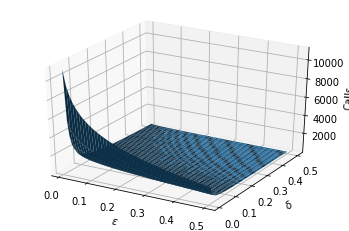

In [6]:
calls = np.zeros((50,50))
for i in range(50):
    for j in range(50):
        f.reset_calls()
        linearity_tester(f, input_dim=1, eps=epss[i], conf=1-deltas[j])
        calls[i][j] = f.get_calls()
plt.figure()
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(epss, deltas)
ax.plot_surface(X, Y, calls)
ax.set_xlabel('$\epsilon$')
ax.set_ylabel('$\delta$')
ax.set_zlabel('Calls')

****

## Nonlinear functions

The test always accepts $\epsilon$-linear functions, and has a false positive probability of $\delta$ (note that $1-\delta$ is our confidence parameter)

### Stretched tanh

Let's test $\tanh\left(\frac{x}{k}\right)$ functions: the larger the $k$, the more the function seems linear around zero

In [7]:
stretches = np.linspace(1,1000,100)
functions = [make_stretched_tanh(stretch=stretch) for stretch in stretches]

For large $k$ the function starts to be accepted, more so for higher $\delta$ (yellow = accepted)

Text(0, 0.5, 'Stretch')

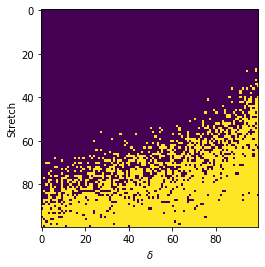

In [8]:
deltas = np.linspace(0.01,0.99,100)
outcomes = np.array([[linearity_tester(f, input_dim=1, eps=0.1, conf=1-delta) for delta in deltas] 
                     for f in functions])
plt.figure()
plt.imshow(outcomes)
plt.xlabel('$\delta$')
plt.ylabel('Stretch')

Non dependence on $\epsilon$ is observed

Text(0, 0.5, 'Noise')

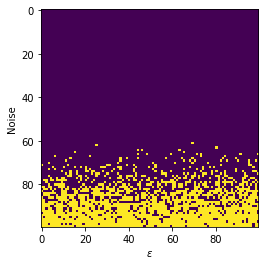

In [9]:
epss = np.linspace(0.01,0.99,100)
outcomes = np.array([[linearity_tester(f, input_dim=1, eps=eps, conf=0.9) for eps in epss] 
                     for f in functions])
plt.figure()
plt.imshow(outcomes)
plt.xlabel('$\epsilon$')
plt.ylabel('Noise')

### Noisy linear

Let's test noisy linear functions $f(x)=x+\mathcal{N}(0,\sigma^2)$

In [10]:
stds = np.linspace(0.01, 1, 100)
functions = [make_noisy_linear(std=std) for std in stds]

The function is rejected even for small $\sigma$. Increasing $\delta$ or $\epsilon$ does not help

Text(0, 0.5, 'Noise')

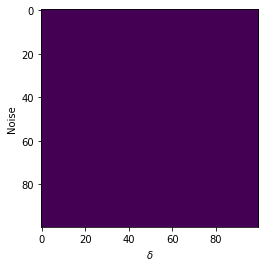

In [11]:
deltas = np.linspace(0.01,0.99,100)
outcomes = np.array([[linearity_tester(f, input_dim=1, eps=0.1, conf=1-delta) for delta in deltas] 
                     for f in functions])
plt.figure()
plt.imshow(outcomes)
plt.xlabel('$\delta$')
plt.ylabel('Noise')

Text(0, 0.5, '\\sigma')

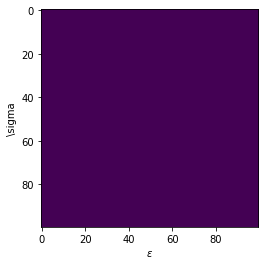

In [12]:
epss = np.linspace(0.01,0.99,100)
outcomes = np.array([[linearity_tester(f, input_dim=1, eps=eps, conf=0.9) for eps in epss] 
                     for f in functions])
plt.figure()
plt.imshow(outcomes)
plt.xlabel('$\epsilon$')
plt.ylabel('\sigma')

### Corrupted linear

Let's test corrupted linear functions $f(x)= x * (1-Be(p))$ where $p$ is the probability of corruption

In [13]:
ps = np.linspace(0, 1, 100)
functions = [make_corrupted_linear(p=p) for p in ps]

Only functions very close to linear are accepted (when $p=1$ the function is constant zero). Increasing $\delta$ or $\epsilon$ does not help much

Text(0, 0.5, 'Corruption')

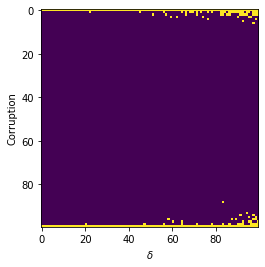

In [14]:
deltas = np.linspace(0.01,0.99,100)
outcomes = np.array([[linearity_tester(f, input_dim=1, eps=0.1, conf=1-delta) for delta in deltas] 
                     for f in functions])
plt.figure()
plt.imshow(outcomes)
plt.xlabel('$\delta$')
plt.ylabel('Corruption')

Text(0, 0.5, 'Corruption')

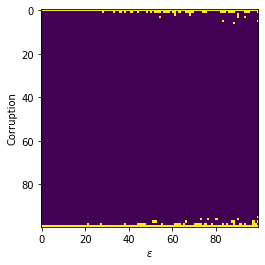

In [15]:
epss = np.linspace(0.01,0.99,100)
outcomes = np.array([[linearity_tester(f, input_dim=1, eps=eps, conf=0.9) for eps in epss] 
                     for f in functions])
plt.figure()
plt.imshow(outcomes)
plt.xlabel('$\epsilon$')
plt.ylabel('Corruption')